In [4]:
%matplotlib inline

In [5]:
%%capture
!pip install mne
!pip install moabb

In [6]:
import os
import numpy as np
import mne
import moabb.datasets

In [7]:
sampling_rate = 512

dataset = moabb.datasets.bi2013a(
    NonAdaptive=True,
    Adaptive=True,
    Training=True,
    Online=True,
)

In [8]:
%%capture
dataset.download(subject_list=[1])

In [9]:
data = dataset.get_data(subjects=[1])

In [10]:
raw = data[1]['session_5']['run_1']
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F5, AFz, F6, T7, Cz, T8, P7, P3, Pz, P4, P8, O1, Oz, ...
 chs: 16 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 17
 projs: []
 sfreq: 512.0 Hz
>


In [11]:
#raw.filter(l_freq=1., h_freq=None)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)
Using matplotlib as 2D backend.


C:\Projects\ml\moabb-bi2013-reformat\venv\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


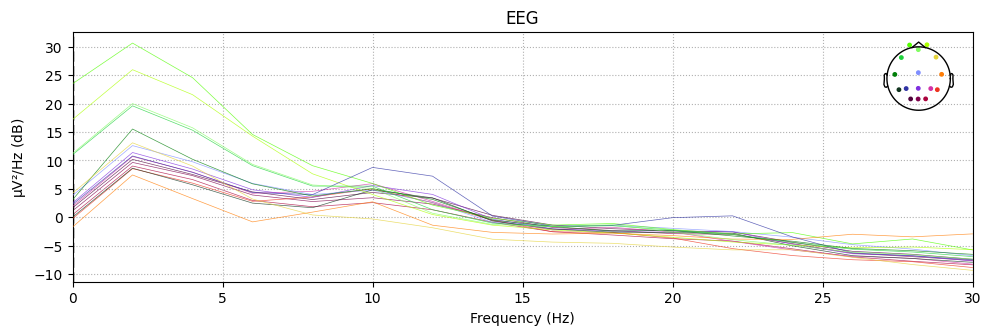

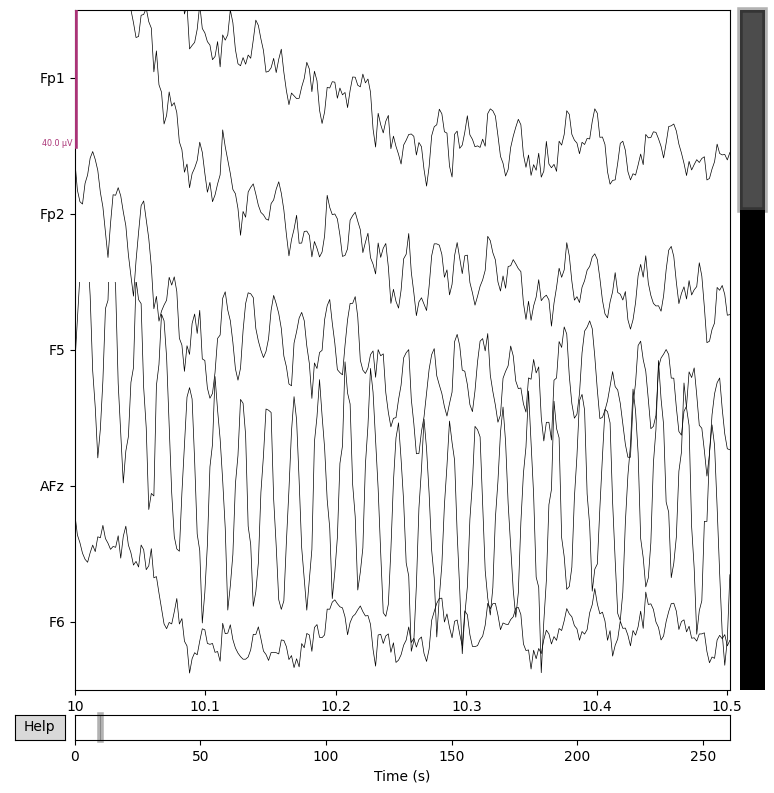

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 0.500 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


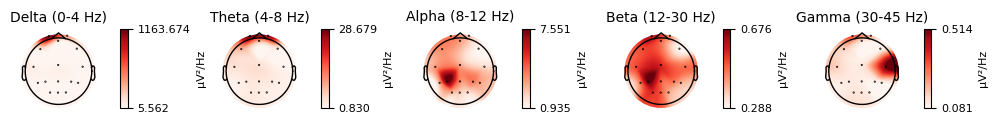

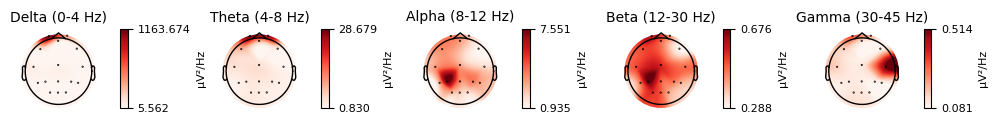

In [12]:
raw.plot_psd(fmax=30)
raw.plot(duration=0.5, n_channels=5, start=10)
raw.plot_psd_topomap()

## Process Events

------------------------------------------------------------------------------------------------------------------------------

In [13]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:10])

480 events found
Event IDs: [33285 33286]
[[11718     0 33286]
 [11862     0 33286]
 [11984     0 33286]
 [12331     0 33286]
 [12563     0 33285]
 [12717     0 33286]
 [12980     0 33286]
 [13133     0 33286]
 [13585     0 33286]
 [13714     0 33286]]


In [14]:
event_dict = {'NonTarget': 33286, 'Target': 33285}

In [15]:
reject_criteria = dict(#mag=4000e-15,    
                       #grad=4000e-13,    
                       eeg=150e-6,     
                       #eog=250e-6
                       )  


In [16]:
%%capture
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.1, tmax=0.9, 
                    preload=True, baseline=(0, 0), reject=reject_criteria)

In [17]:
target_epochs = epochs['Target']
non_target_epochs = epochs['NonTarget']

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated


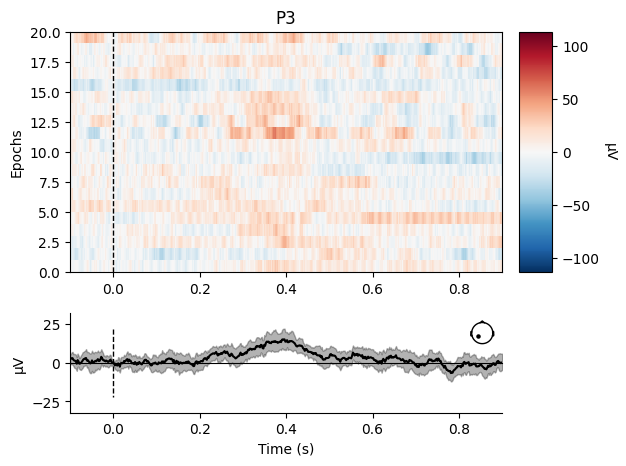

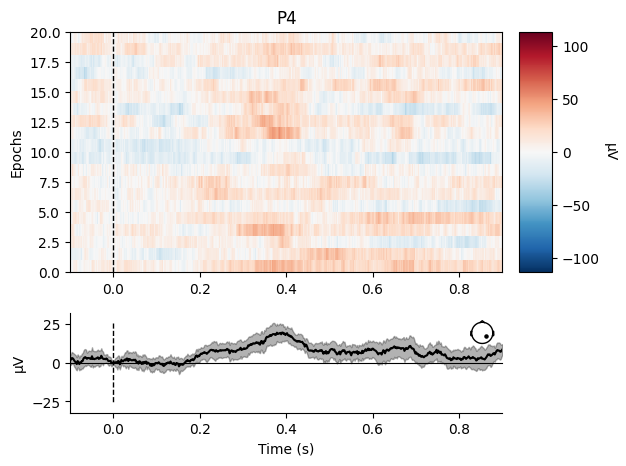

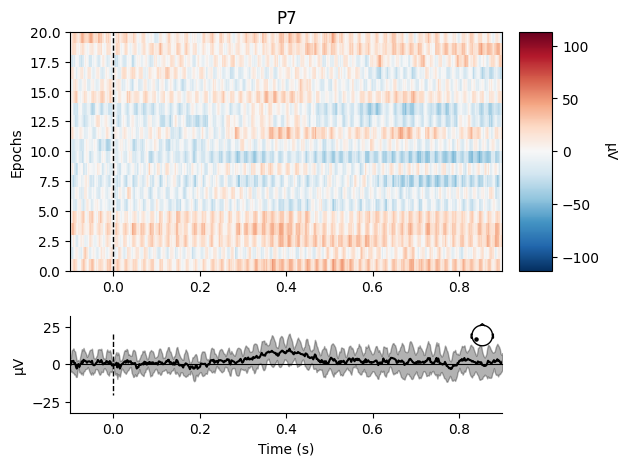

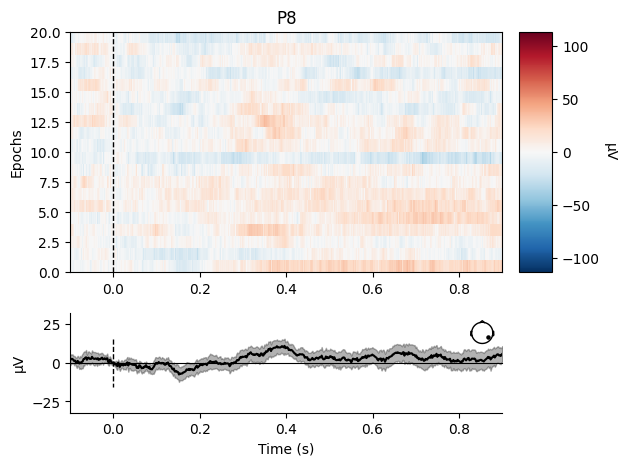

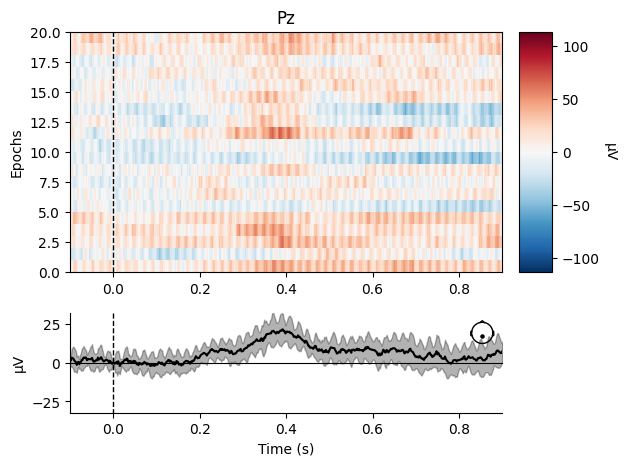

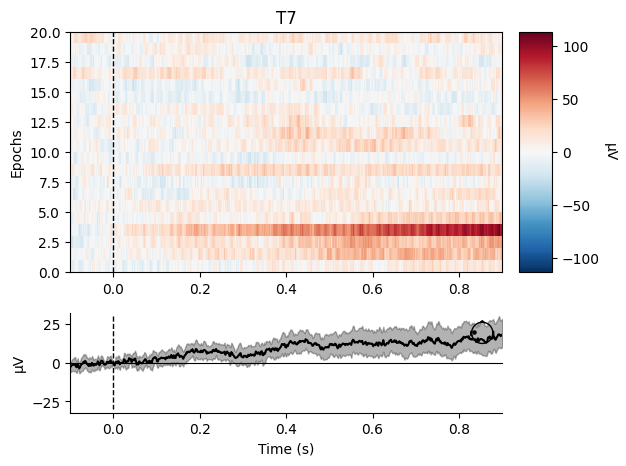

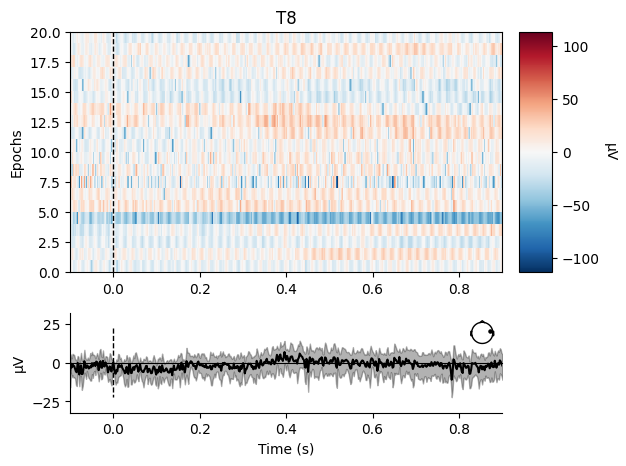

[<Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>,
 <Figure size 640x480 with 4 Axes>]

In [23]:
target_epochs.plot_image(picks=['P3', 'P4', 'P7', 'P8', 'Pz', 'T7', 'T8'])

combining channels using "gfp"
combining channels using "gfp"


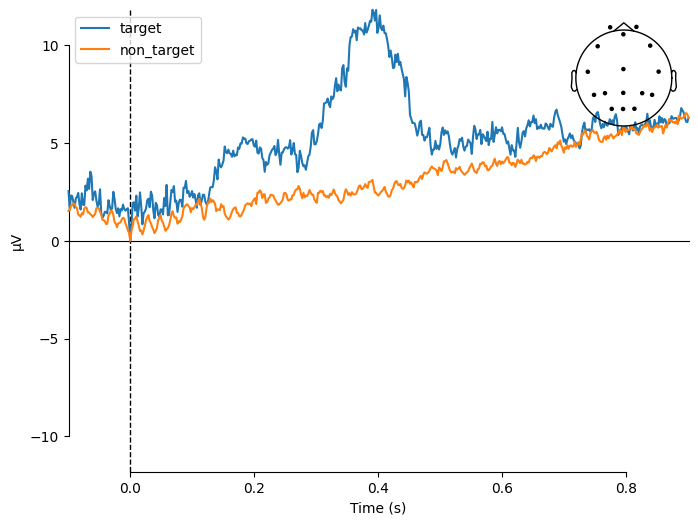

[<Figure size 800x600 with 2 Axes>]

In [19]:
target_evoked = target_epochs.average()
non_target_evoked = non_target_epochs.average()

mne.viz.plot_compare_evokeds(dict(target=target_evoked, non_target=non_target_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


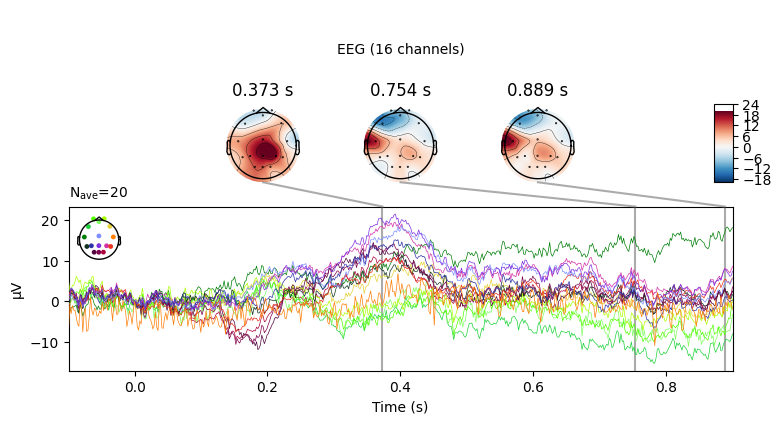

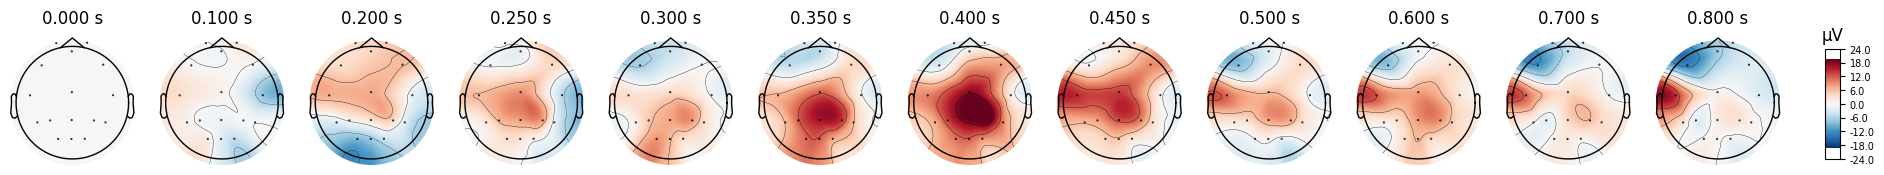

In [27]:
target_evoked.plot_joint(picks='eeg')
target_evoked.plot_topomap(times=[0., 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8], ch_type='eeg')
pass

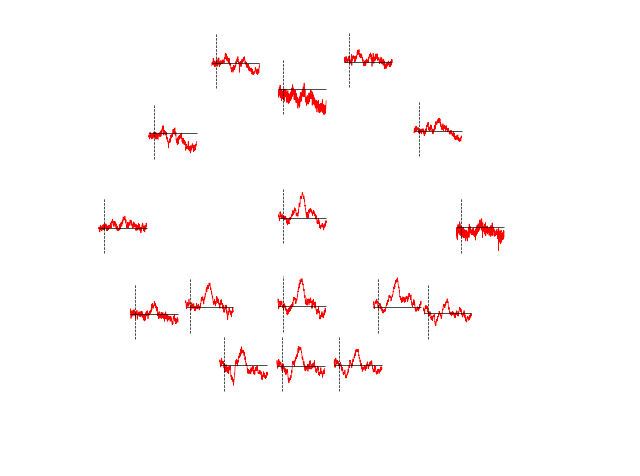

In [29]:
evoked_diff = mne.combine_evoked([target_evoked, non_target_evoked], weights=[1, -1])
evoked_diff.pick_types(eeg=True).plot_topo(color='r', legend=False)
pass

## Export Epochs to CSV

In [32]:
epochs.to_data_frame().to_csv('./epochs.csv')